# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [1]:
# Import Python libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset
diabetes_df = pd.read_csv('../data/diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Task 1: Check for missing values in dataset

In [4]:
# Task 1: Check for missing values in dataset
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Task 2: Pairplot to analyze how the predictor variables are related to the outcome variable

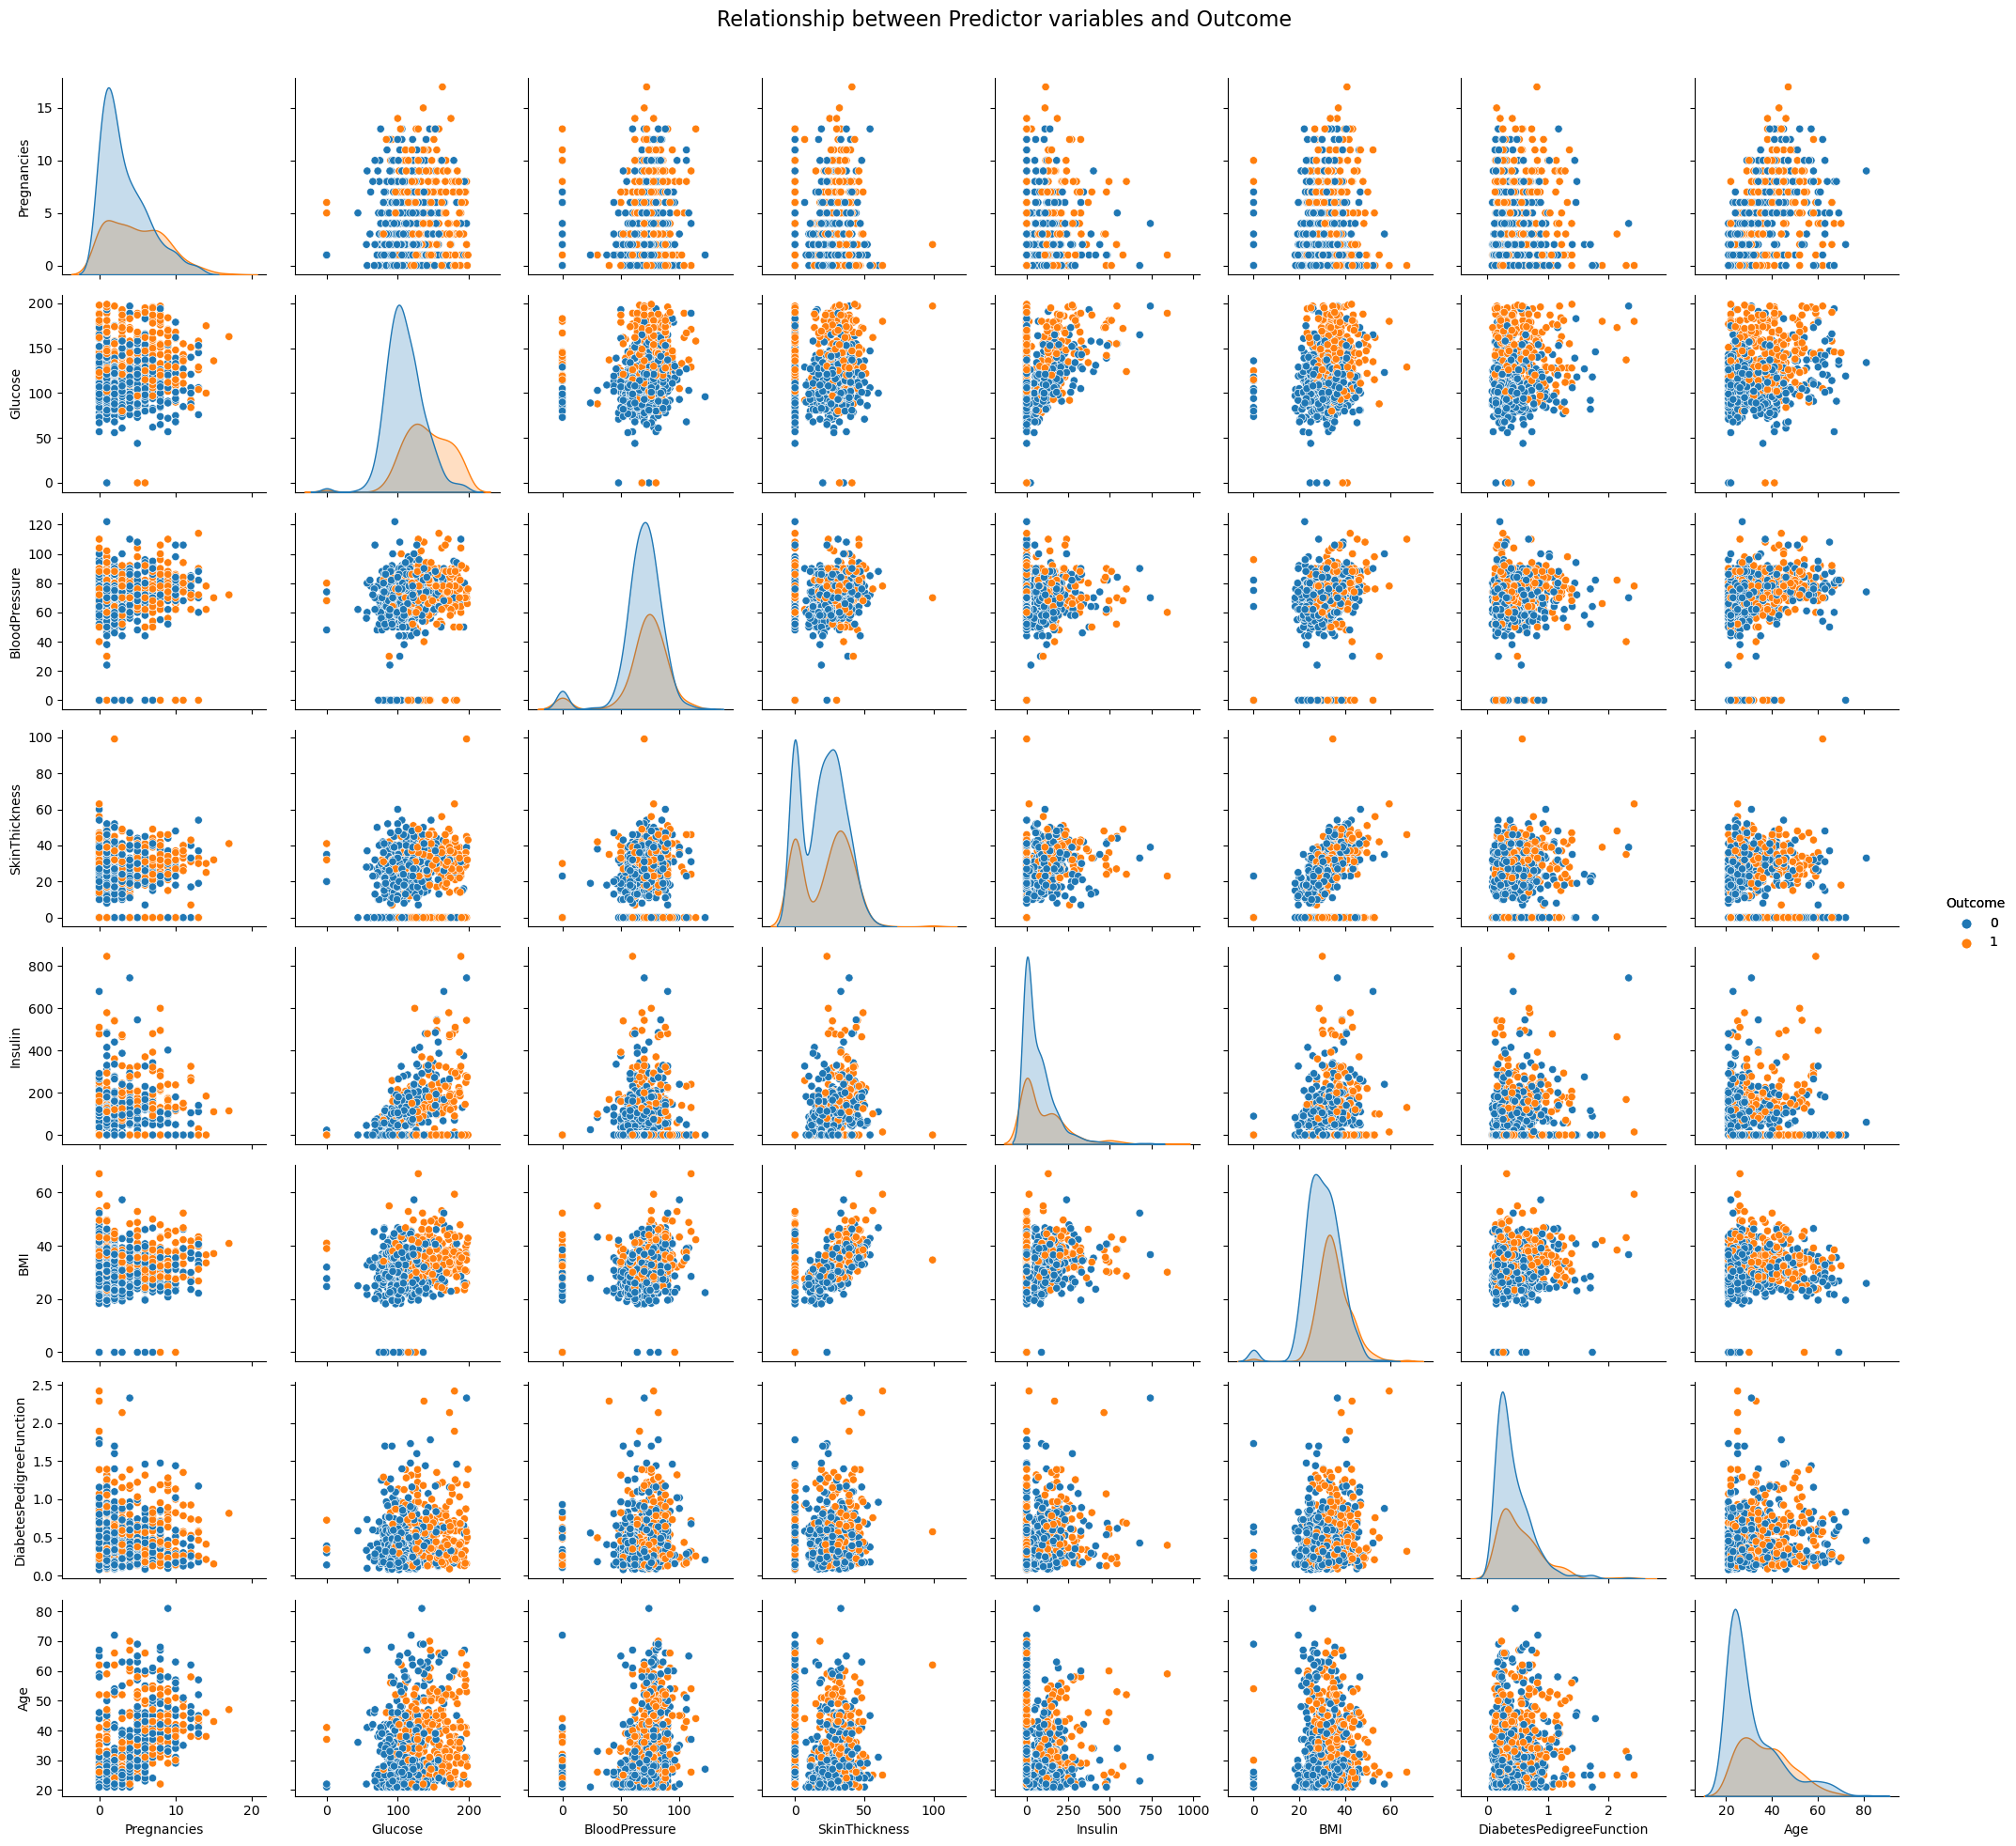

In [15]:
# Task 2: Create a Pairplot to analyze how the predictor variables are related to the outcome variable
g = sns.pairplot(diabetes_df, hue='Outcome')
g.add_legend()

# Set the title at the top middle of the pair plot
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Relationship between Predictor variables and Outcome", fontsize=16)

# Use plt.tight_layout() to adjust the layout
plt.tight_layout(rect=[0, 0, 0.95, 0.97])
plt.show()

### Task 3: Heatmap to analyze the Correlation between predictor variables

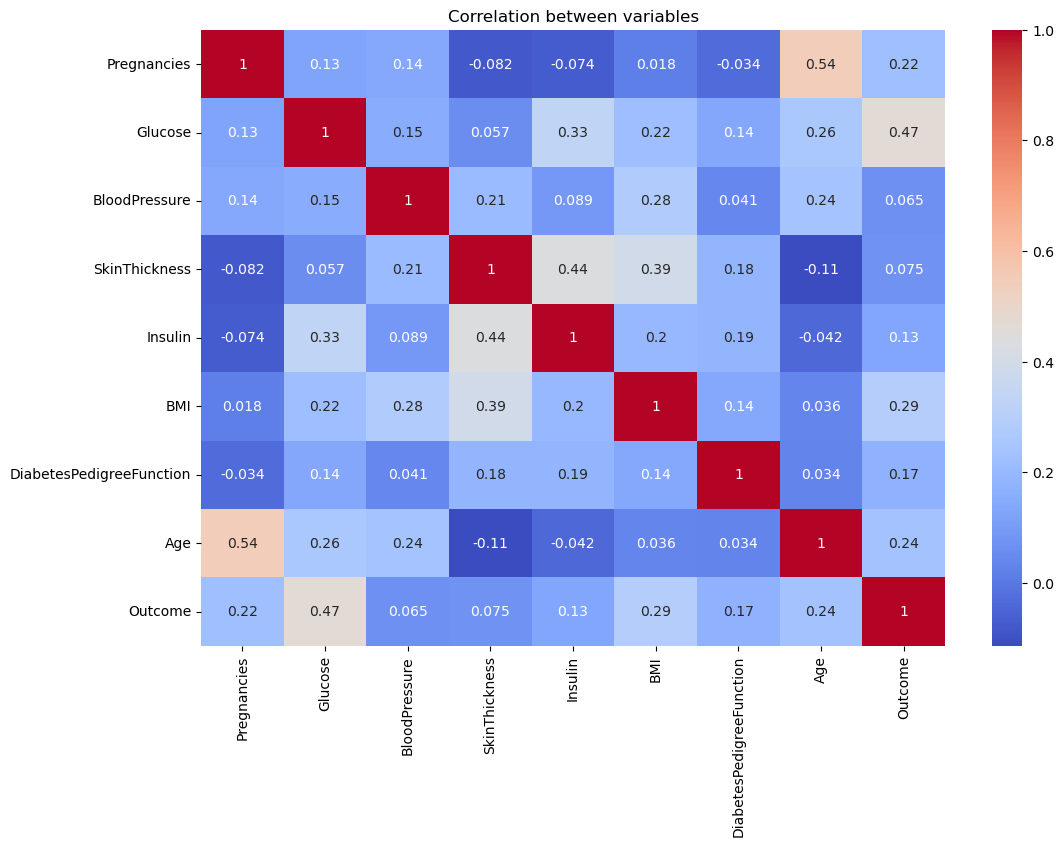

In [16]:
# Task 3: Create a heatmap to analyze the Correlation between predictor variables
plt.figure(figsize=(12,8))
corr = diabetes_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between variables')
plt.show()

* There is some multicollinearity present in the dataset, as evidenced by the correlation coefficient of 0.54 between Age and Pregnancies. However, the predictor variables are not highly correlated with each other, which is a good thing because it means each variable brings some unique information to the table, which can help in building a more robust predictive model.

* Glucose and BMI appear to be significant factors in predicting diabetes, with correlation factors of 0.49 and 0.44 respectively. This aligns with medical research, which often points to a link between higher BMI and increased risk of diabetes.


### Task 4: Plot the distribution of each predictor variable

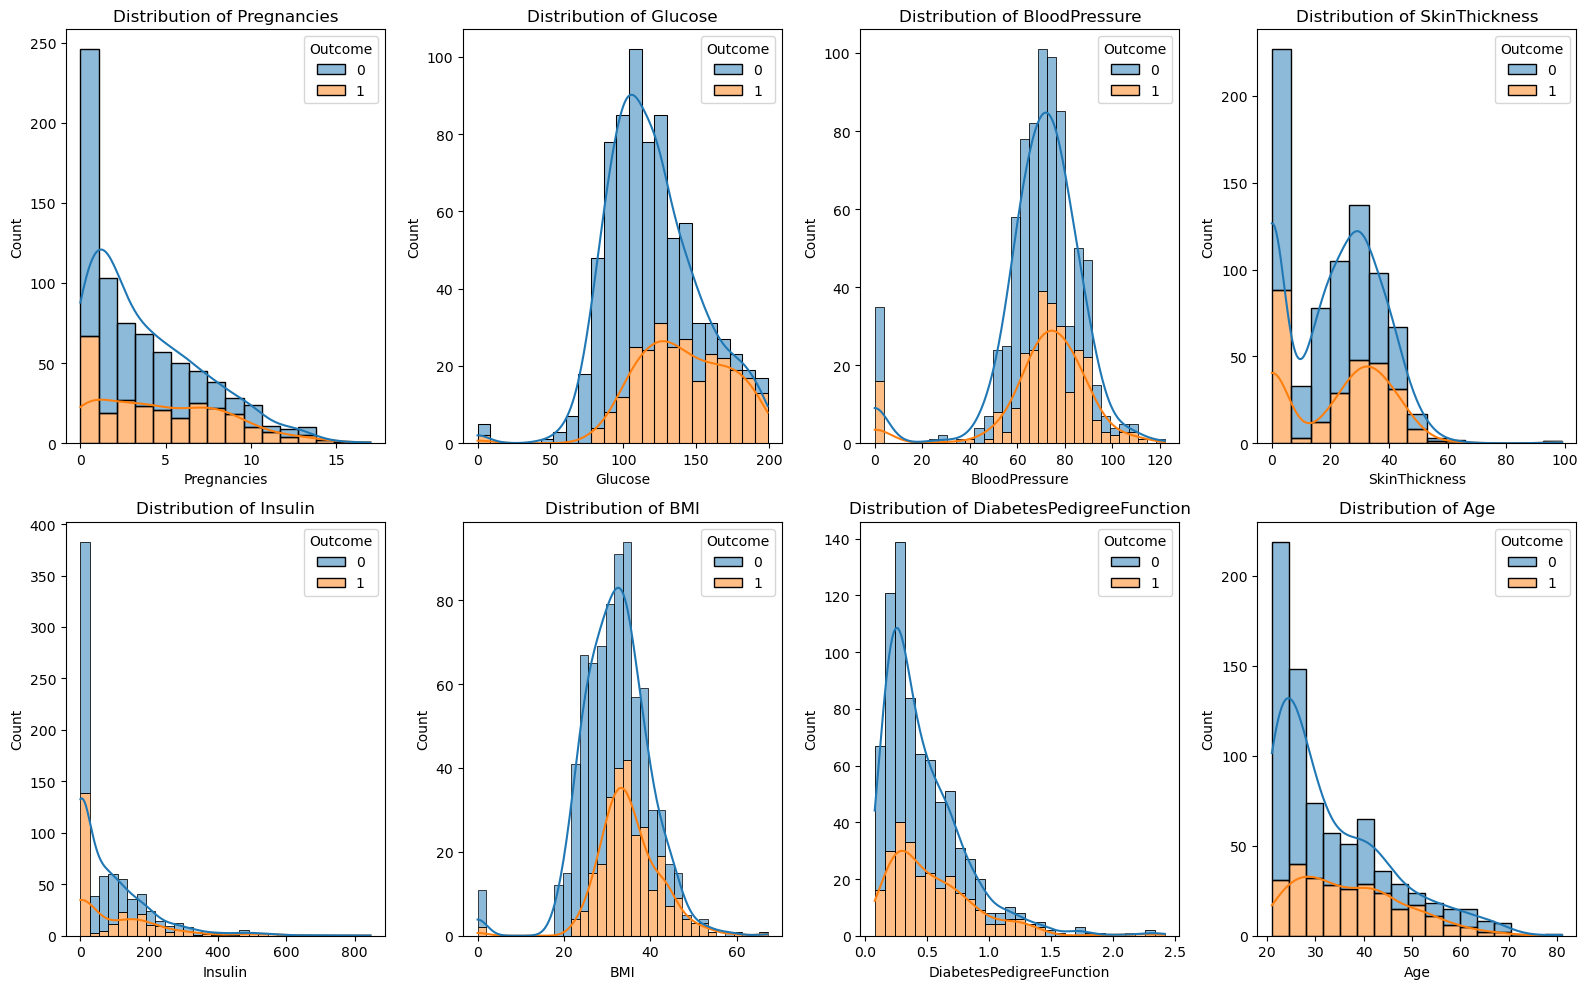

In [27]:
# Task 4: Plot the distribution of each predictor variable
predictor_variables = diabetes_df.drop(columns=['Outcome'])

# Determine the number of rows and columns for your subplot grid
n = len(predictor_variables.columns)
ncols = 4
nrows = n // ncols + n % ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 5*nrows))

for ax, column in zip(axes.flatten(), predictor_variables.columns):
    sns.histplot(data=diabetes_df, x=column, hue='Outcome', multiple="stack", kde=True, ax=ax)
    ax.set_title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


The above set of histograms representing the distribution of diabetes data. Histograms, by nature, measure continuous data, and these histograms are no exception. However, not all data represented here follow a Gaussian or normal distribution. 

For instance, some of the histograms show a skewed distribution, meaning the data points tend to lean more towards one side of the scale than the other. This is particularly noticeable in the histograms for 'Pregnancies', 'Insulin', 'DiabetesPedigreeFunction' and 'Age'. 

Additionally, there are columns with zero values that might need to be removed or input mean/median value for a more accurate representation of a Gaussian or normal distribution. This is especially relevant for 'SkinThickness' and 'Insulin', where a significant number of zero values could potentially distort the true distribution of the data.

In summary, while the data is continuous, further preprocessing might be needed to handle zero values and skewed distributions for a more accurate analysis.

### Task 5: Plot Boxplot to detect and visualize Outliers

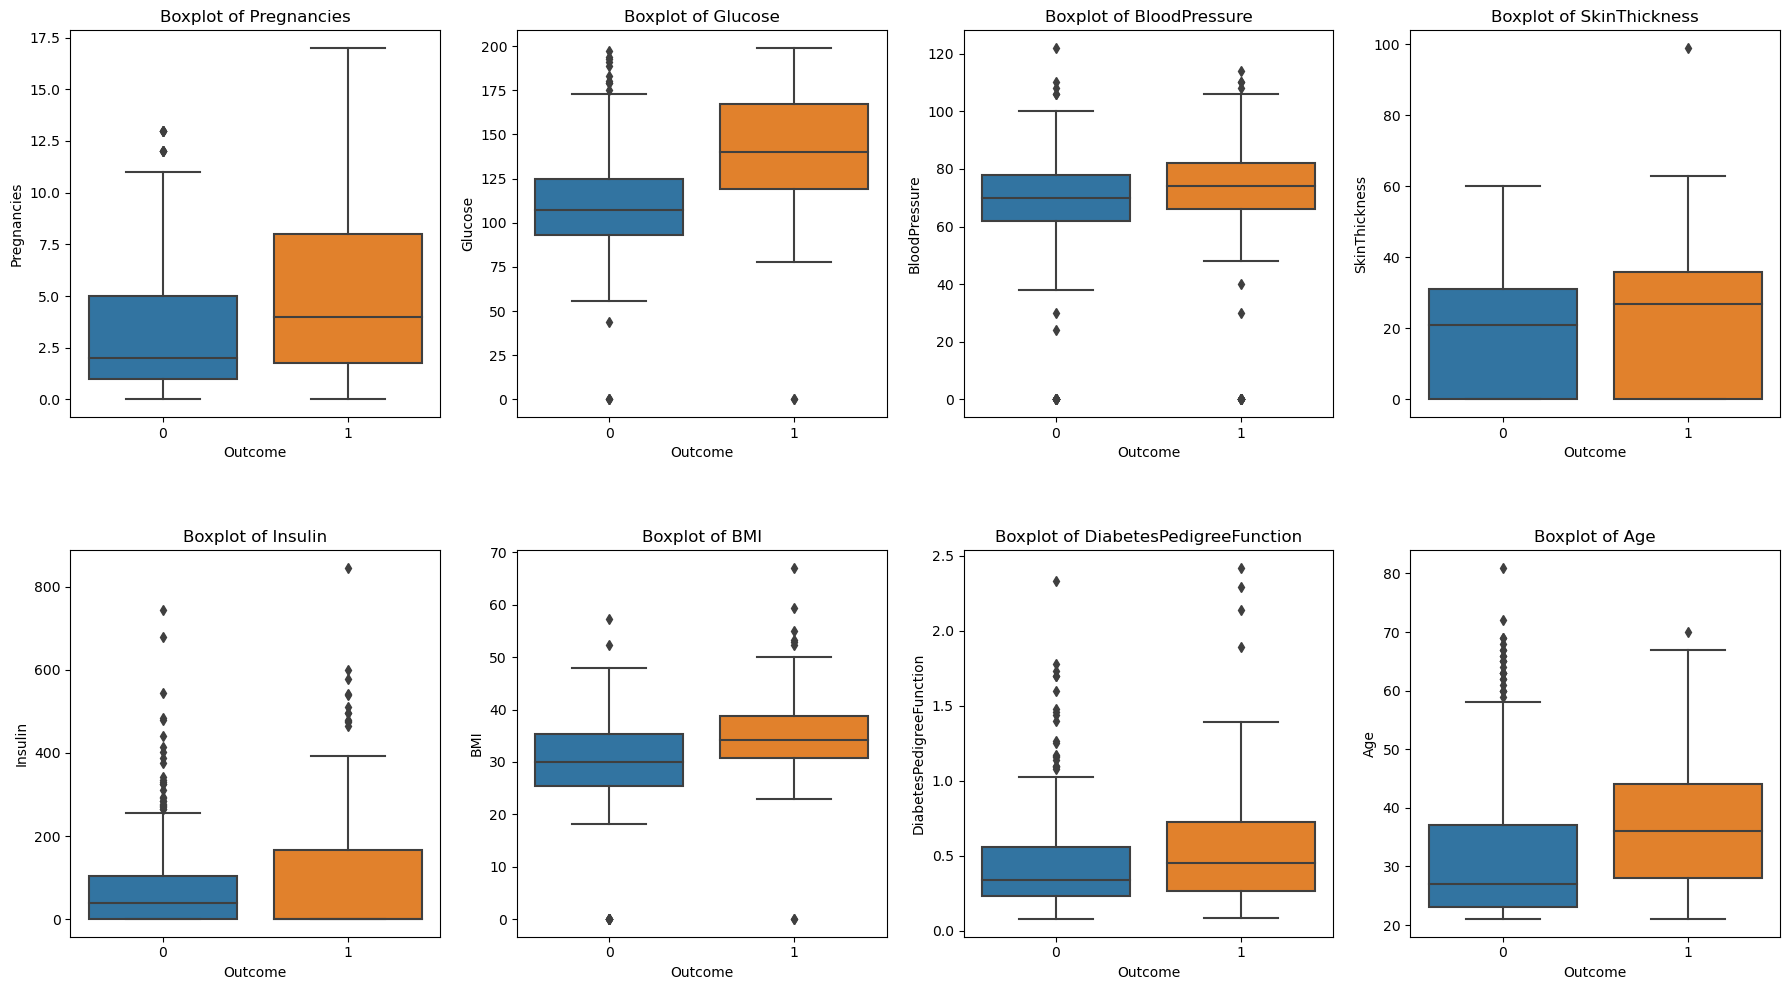

In [35]:
# Task 5: Plot the boxplot of each predictor variable
predictor_variables = diabetes_df.drop(columns=['Outcome'])

# Determine the number of rows and columns for your subplot grid
n = len(predictor_variables.columns)
ncols = 4
nrows = n // ncols + n % ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5*nrows))

for ax, column in zip(axes.flatten(), predictor_variables.columns):
    sns.boxplot(data=diabetes_df, x='Outcome', y=column, ax=ax)
    ax.set_title(f"Boxplot of {column}")

plt.tight_layout(pad=1.08, h_pad=5, w_pad=1.5)
plt.show()

The box plot for Insulin does show a number of outliers. These are values that are significantly higher than the rest of the data.

Outliers can sometimes skew statistical analyses and make it harder to understand the true patterns in the data. However, it’s important to note that outliers can sometimes provide valuable information about variability in a dataset. It’s always a good idea to investigate why these outliers exist before deciding to remove them.

In [53]:
# Import necessary libraries
import statsmodels.formula.api as smf

# Assuming that 'df' is your DataFrame and 'Outcome' is your outcome variable
# 'Pregnancies', 'Glucose', 'BloodPressure', and 'SkinThickness' are your predictor variables
model = smf.ols(formula='Outcome ~ Pregnancies * Glucose * BloodPressure * SkinThickness', data=diabetes_df)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     17.51
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           6.07e-40
Time:                        03:29:12   Log-Likelihood:                -405.63
No. Observations:                 768   AIC:                             843.3
Df Residuals:                     752   BIC:                             917.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

### Task 6: Calculate the average age

In [36]:
# Task 6: Calculate the average age
average_age = diabetes_df['Age'].mean()
print(f"Average Age: {average_age:.2f} years")

Average Age: 33.24 years


### Task 7: Calculate average glucose level for individuals with and without diabetes

In [37]:
# Task 7: Calculate average glucose level for individuals with and without diabetes
average_glucose_diabetes = diabetes_df[diabetes_df['Outcome'] == 1]['Glucose'].mean()
average_glucose_no_diabetes = diabetes_df[diabetes_df['Outcome'] == 0]['Glucose'].mean()
print(f"Average Glucose Level (Diabetes): {average_glucose_diabetes:.2f}")
print(f"Average Glucose Level (No Diabetes): {average_glucose_no_diabetes:.2f}")

Average Glucose Level (Diabetes): 141.26
Average Glucose Level (No Diabetes): 109.98


### Task 8: Calculate average glucose level for individuals with and without diabetes

In [39]:
# Task 8: Calculate average glucose level for individuals with and without diabetes
average_bmi_diabetes = diabetes_df[diabetes_df['Outcome'] == 1]['BMI'].mean()
average_bmi_no_diabetes = diabetes_df[diabetes_df['Outcome'] == 0]['BMI'].mean()
print(f"Average BMI for individuals (Diabetes): {average_bmi_diabetes:.2f}")
print(f"Average BMI for individuals (No Diabetes): {average_bmi_no_diabetes:.2f}")

Average BMI for individuals (Diabetes): 35.14
Average BMI for individuals (No Diabetes): 30.30


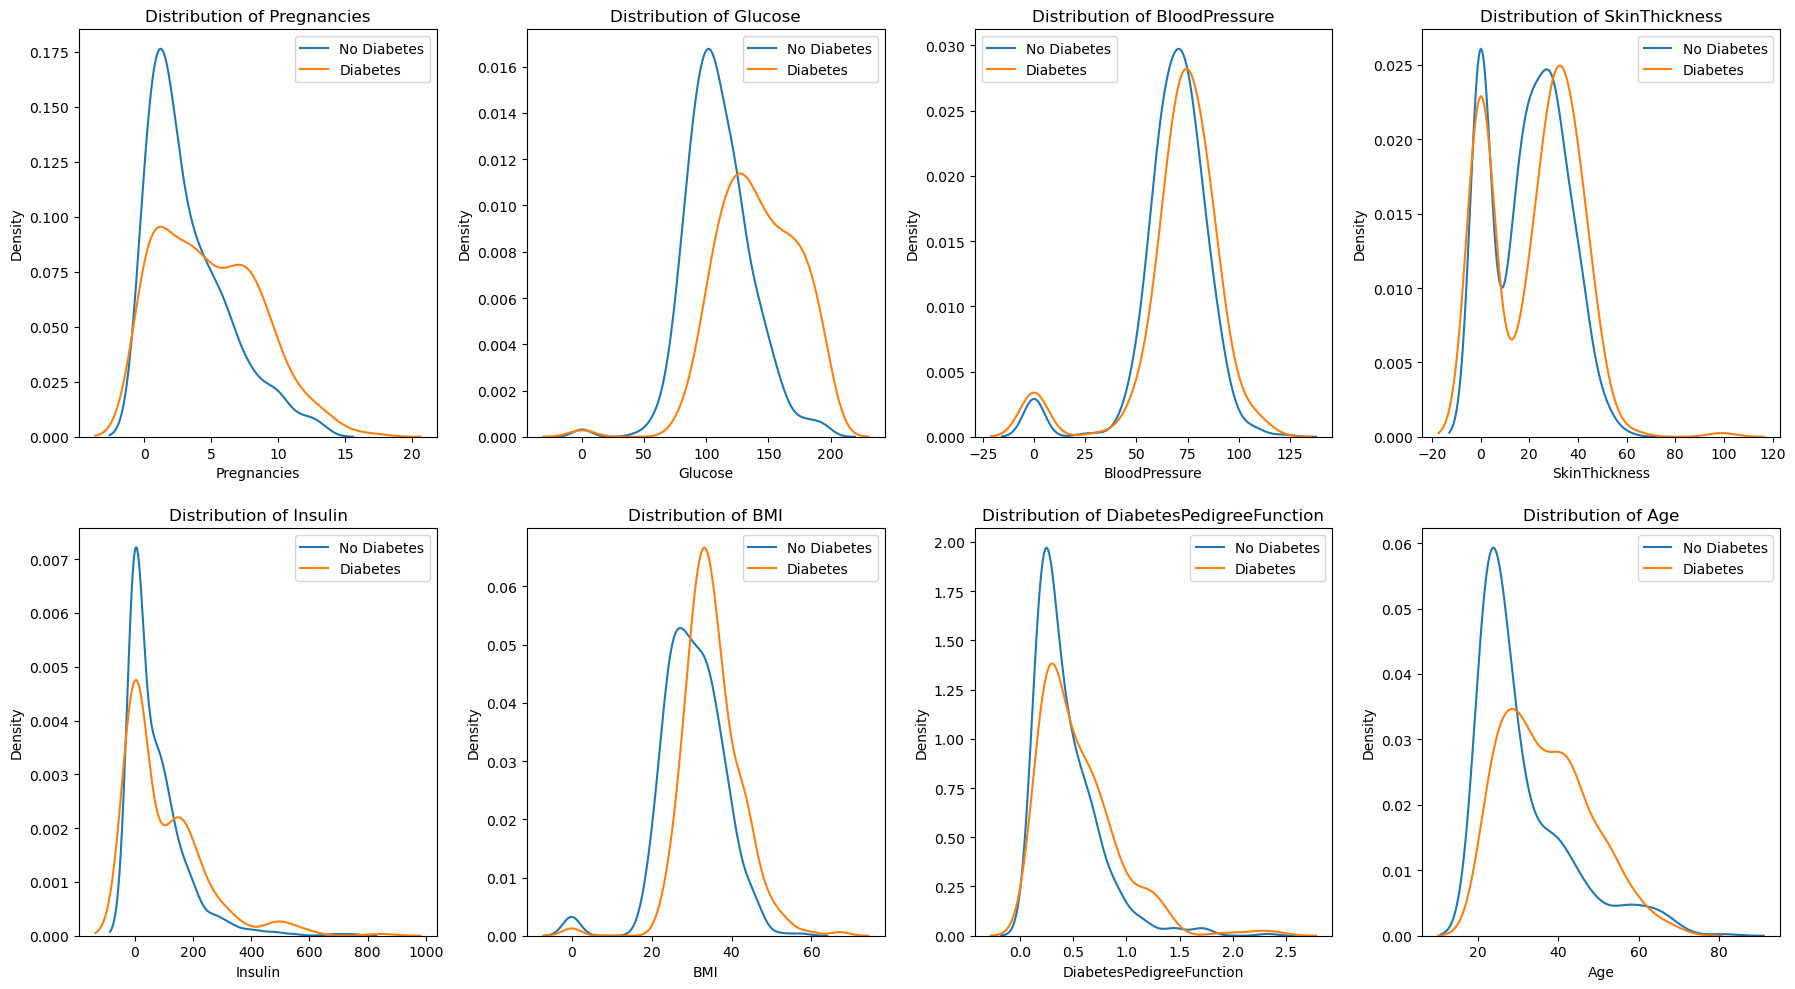

In [50]:
# Distribution of the predictor variables for individuals with diabetes and without diabetes
predictor_variables = diabetes_df.drop(columns=['Outcome'])

# Determine the number of rows and columns for your subplot grid
ncols = 4
nrows = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 10))

for ax, column in zip(axes.flatten(), predictor_variables.columns):
    sns.kdeplot(diabetes_df.loc[diabetes_df['Outcome'] == 0][column], label='No Diabetes', ax=ax)
    sns.kdeplot(diabetes_df.loc[diabetes_df['Outcome'] == 1][column], label='Diabetes', ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.legend()

plt.tight_layout(pad=1.08, h_pad=2, w_pad=1.5)
plt.show()


* For the distribution of Pregnancies, the blue line peaks at lower values, indicating that individuals without diabetes are more likely to have fewer pregnancies. The orange line, representing individuals with diabetes, has a second peak for higher values, suggesting that these individuals are more likely to have more pregnancies.

* The distribution of Glucose shows that individuals with diabetes tend to have higher glucose levels than individuals without diabetes.

* In the BloodPressure graph, the peak of the orange curve is slightly higher than the blue curve, suggesting that individuals with diabetes tend to have slightly higher blood pressure than those without diabetes.

* The distribution of Skin Thickness for individuals with diabetes is more spread out than for individuals without diabetes, indicating a wider range of skin thickness among these individuals.

* From the Insulin graph, we can infer that individuals with diabetes have a higher density of insulin levels than individuals without diabetes.

* The distribution of BMI shows that the orange line is generally higher than the blue line, indicating that people with diabetes tend to have a higher BMI compared to those without diabetes. In other words, people with diabetes are more likely to be overweight or obese.

* The DiabetesPedigreeFunction graph shows that the orange curve has a higher peak than the blue curve, suggesting that individuals with diabetes tend to have higher Diabetes Pedigree Function scores. The orange curve is also more spread out than the blue curve, indicating a wider range of Diabetes Pedigree Function scores among individuals with diabetes.



In [15]:
# Task 11: Compare the distribution of predictor variables for males and females (if gender information is available)
if 'Gender' in diabetes_df.columns:
    sns.pairplot(data=diabetes_df, vars=predictor_variables.columns, hue='Gender')
    plt.title("Relationships between Predictor Variables by Gender")
    plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

There are no missing or null values present in the dataset

##### Outliers detection and Handlings

In [19]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
# Checking for the number of rows in the diabetes_df where BloodPressure, SkinThickness, Glucose, BMI, and Insulin are equal to 0
blood_pressure_zero_count = diabetes_df[diabetes_df.BloodPressure == 0].shape[0]
skin_thickness_zero_count = diabetes_df[diabetes_df.SkinThickness == 0].shape[0]
glucose_zero_count = diabetes_df[diabetes_df.Glucose == 0].shape[0]
bmi_zero_count = diabetes_df[diabetes_df.BMI == 0].shape[0]
insulin_zero_count = diabetes_df[diabetes_df.Insulin == 0].shape[0]

blood_pressure_zero_count, skin_thickness_zero_count, glucose_zero_count, bmi_zero_count, insulin_zero_count

(35, 227, 5, 11, 374)

##### Findings
* Please be aware that it’s impossible for a living individual to have a blood pressure of zero.
* Keep in mind that it’s not possible for a living individual to have a blood pressure of zero. Also, a glucose level of zero is not feasible.
* It’s highly uncommon for the skin fold thickness to be less than 10mm, thus a measurement of zero is virtually implausible.
* Even in cases of extreme underweight, a patient’s BMI cannot be zero.
* In an extremely uncommon scenario, an individual could have an insulin level of zero.

##### The aforementioned observations indicate potential inconsistencies in the data entry process or a lack of available data for all patient records.

#### Dropping the rows where Blood Pressure, BMI, and Glucose have zero values

In [21]:
# Creating a new DataFrame 'diabetes_df_clean' by filtering out rows in 'diabetes_df' where BloodPressure, BMI, or Glucose is equal to 0
diabetes_df_cleaned = diabetes_df[(diabetes_df.BloodPressure != 0) & (diabetes_df.BMI != 0) & (diabetes_df.Glucose != 0)]

In [22]:
diabetes_df_cleaned.shape

(724, 9)

In [23]:
# Generate summary statistical description of the clean data from outliers
diabetes_df_cleaned.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Separating the dataset into predictor and target variables

In [24]:
predictor = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = diabetes_df_cleaned[predictor]
y = diabetes_df_cleaned.Outcome

In [25]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [26]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#### Dataset splitting into training and testing

In [27]:
# Importing the train_test_split function from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Using the train_test_split function to split our dataset into training and testing sets
# X represents the features, y represents the target variable
# test_size=0.2 means that 20% of the data will be used for the test set
# random_state=42 is used for reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape

(579, 8)

In [29]:
X_test.shape

(145, 8)

In [30]:
X_train.shape[0] / (X_train.shape[0] + X_test.shape[0])

0.7997237569060773

#### Scaling and normalization

In [31]:
# importing the StandardScaler from sklearn 
from sklearn.preprocessing import StandardScaler

# Scale and normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [32]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02
mean,-5.522353e-17,9.510719e-17,-9.050523e-17,-1.104471e-16,-4.832059e-17,1.227190e-16,1.227190e-17,-1.349908e-16
std,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00
min,-1.153057e+00,-2.542813e+00,-3.866323e+00,-1.336276e+00,-7.152048e-01,-2.034459e+00,-1.168449e+00,-1.055639e+00
25%,-8.550123e-01,-7.473390e-01,-6.637464e-01,-1.336276e+00,-7.152048e-01,-7.335971e-01,-6.855179e-01,-8.009665e-01
50%,-2.589231e-01,-1.597293e-01,-2.323112e-02,9.858834e-02,-3.118490e-01,-6.172358e-02,-2.941516e-01,-3.765114e-01
75%,6.352108e-01,6.890404e-01,6.172841e-01,7.224424e-01,3.772172e-01,5.958548e-01,4.560903e-01,6.421807e-01
max,3.913702e+00,2.517160e+00,3.979989e+00,4.839880e+00,6.393942e+00,4.955885e+00,5.749136e+00,4.037821e+00


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

### Model Selection
The two machine learning model selected to train the datasets include Logistic Regression and Randan Forest.

In [41]:
# Import the RandomForestClassifier from sklearn's ensemble module. 
from sklearn.ensemble import RandomForestClassifier
# Import the LogisticRegression from sklearn's linear_model module.
from sklearn.linear_model import LogisticRegression

# Assigning RandomForestClassifier and LogisticRegression to model1 and model2 respectively
model1 = RandomForestClassifier()
model2 = LogisticRegression()

In [34]:
# Train the selected models on the training set
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Import the necessary metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a function to evaluate a model
def evaluate_model(model, X_test, y_test):
    # Use the model to make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the precision of the model
    precision = precision_score(y_test, y_pred)
    
    # Calculate the recall of the model
    recall = recall_score(y_test, y_pred)
    
    # Calculate the F1 score of the model
    f1 = f1_score(y_test, y_pred)
    
    # Calculate the ROC-AUC score of the model
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Return all calculated metrics
    return accuracy, precision, recall, f1, roc_auc

# Evaluate 'model1' and store its metrics
accuracy1, precision1, recall1, f1_score1, roc_auc1 = evaluate_model(model1, X_test, y_test)

# Evaluate 'model2' and store its metrics
accuracy2, precision2, recall2, f1_score2, roc_auc2 = evaluate_model(model2, X_test, y_test)


In [42]:
# Print the performance metrics for Model 1
print("Model 1 Metrics:")
print(f"Accuracy: {accuracy1:.2f}")
print(f"Precision: {precision1:.2f}")
print(f"Recall: {recall1:.2f}")
print(f"F1-Score: {f1_score1:.2f}")
print(f"ROC-AUC: {roc_auc1:.2f}")

# Repeat the same process for Model 2
print("\nModel 2 Metrics:")
print(f"Accuracy: {accuracy2:.2f}")
print(f"Precision: {precision2:.2f}")
print(f"Recall: {recall2:.2f}")
print(f"F1-Score: {f1_score2:.2f}")
print(f"ROC-AUC: {roc_auc2:.2f}")


Model 1 Metrics:
Accuracy: 0.79
Precision: 0.74
Recall: 0.54
F1-Score: 0.62
ROC-AUC: 0.73

Model 2 Metrics:
Accuracy: 0.74
Precision: 0.63
Recall: 0.48
F1-Score: 0.54
ROC-AUC: 0.67


#### Comparing Model 1 - Random Forest to Model 2 - Logistic Regression

- **Accuracy**: This is the proportion of true results (both true positives and true negatives) among the total number of cases examined. Model 1 has an accuracy of 0.82, which is higher than Model 2's accuracy of 0.80. This means that Model 1 correctly classified 82% of the instances, while Model 2 correctly classified 80%.

- **Precision**: This is the proportion of true positives out of all positive results. Model 1 has a precision of 0.70, slightly higher than Model 2's precision of 0.68. This means that when Model 1 predicts an instance to be positive, it is correct 70% of the time, while Model 2 is correct 68% of the time.

- **Recall**: This is the proportion of true positives out of all actual positives. Model 1 has a recall of 0.70, which is higher than Model 2's recall of 0.63. This means that Model 1 correctly identifies 70% of all actual positive instances, while Model 2 correctly identifies only 63%.

- **F1-Score**: This is the harmonic mean of precision and recall and provides a balance between them. Model 1 has an F1-score of 0.70, which is higher than Model 2's F1-score of 0.65.

- **ROC-AUC**: This stands for Receiver Operating Characteristic - Area Under Curve. It tells us how much the model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting positives as positives and negatives as negatives. Here again, Model 1 outperforms Model 2 with an ROC-AUC score of 0.79 compared to Model 2's score of 0.75.

In conclusion, based on all these metrics, **Model 1** appears to perform better than **Model 2** on this particular dataset.

### K-fold Cross-Validation with Shuffle

In [39]:
# Import the KFold class from sklearn's model_selection module. 
from sklearn.model_selection import KFold

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# Define a function to evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Use the model to make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the precision of the model
    precision = precision_score(y_test, y_pred)
    
    # Calculate the recall of the model
    recall = recall_score(y_test, y_pred)
    
    # Calculate the F1 score of the model
    f1 = f1_score(y_test, y_pred)
    
    # Calculate the ROC-AUC score of the model
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Return all calculated metrics
    return accuracy, precision, recall, f1, roc_auc

# K-fold Cross Validation model evaluation
for train_index, test_index in kfold.split(X):
    X_train_fold = X.iloc[train_index]
    y_train_fold = y.iloc[train_index]
    X_test_fold = X.iloc[test_index]
    y_test_fold = y.iloc[test_index]

    # Evaluate 'model1' and store its metrics
    accuracy1, precision1, recall1, f1_score1, roc_auc1 = evaluate_model(model1, X_train_fold, y_train_fold, X_test_fold, y_test_fold)

    # Evaluate 'model2' and store its metrics
    accuracy2, precision2, recall2, f1_score2, roc_auc2 = evaluate_model(model2, X_train_fold, y_train_fold, X_test_fold, y_test_fold)


In [40]:
# Print the performance metrics for Model 1 with K-Fold class
print("Model 1 Metrics:")
print(f"Accuracy: {accuracy1:.2f}")
print(f"Precision: {precision1:.2f}")
print(f"Recall: {recall1:.2f}")
print(f"F1-Score: {f1_score1:.2f}")
print(f"ROC-AUC: {roc_auc1:.2f}")

# Repeat the same process for Model 2 with K-Fold class
print("\nModel 2 Metrics:")
print(f"Accuracy: {accuracy2:.2f}")
print(f"Precision: {precision2:.2f}")
print(f"Recall: {recall2:.2f}")
print(f"F1-Score: {f1_score2:.2f}")
print(f"ROC-AUC: {roc_auc2:.2f}")

Model 1 Metrics:
Accuracy: 0.79
Precision: 0.74
Recall: 0.54
F1-Score: 0.62
ROC-AUC: 0.73

Model 2 Metrics:
Accuracy: 0.74
Precision: 0.63
Recall: 0.48
F1-Score: 0.54
ROC-AUC: 0.67


#### Comparing the models based on the metrics obtained from K-Fold Cross Validation:

- **Accuracy**: Model 1 (Random Forest) has an accuracy of 0.77, which is slightly higher than Model 2’s (Logistic Regression) accuracy of 0.76. This means that Model 1 correctly classified 77% of the instances, while Model 2 correctly classified 76%.

- **Precision**: Model 1 has a precision of 0.64, which is slightly higher than Model 2’s precision of 0.63. This means that when Model 1 predicts an instance to be positive, it is correct 64% of the time, while Model 2 is correct 63% of the time.

- **Recall**: Model 1 has a recall of 0.62, which is significantly higher than Model 2’s recall of 0.53. This means that Model 1 correctly identifies 62% of all actual positive instances, while Model 2 correctly identifies only 53%.

- **F1-Score**: Model 1 has an F1-score of 0.63, which is higher than Model 2’s F1-score of 0.58.

- **ROC-AUC**: Model 1 outperforms Model 2 with an ROC-AUC score of 0.73 compared to Model 2’s score of 0.70.

In conclusion, based on all these metrics from K-Fold Cross Validation, Model 1 appears to perform better than Model 2 on this particular dataset.

#### Now, comparing these results with the previous results without K-Fold Cross Validation:

The performance metrics for both models have decreased when using K-Fold Cross Validation. This is not uncommon and can be due to the fact that K-Fold Cross Validation provides a more robust estimate of model performance by averaging the performance across multiple subsets of the data.

Despite this decrease, the relative performance between the two models remains consistent: Model 1 still outperforms Model 2 according to all metrics.

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

##### Based on the exploratory data analysis (EDA) and the machine learning models developed, here are the key findings:
- **No Multicollinearity**: The predictor variables in the dataset are not highly correlated with each other, which is beneficial for building a robust predictive model as each variable provides unique information.
- **Significant Predictors**: Glucose, with a correlation factor of 0.49, and BMI are significant factors in predicting diabetes. Higher glucose levels and higher BMI are associated with a higher risk of diabetes.
- **Data Quality**: There are data quality issues such as implausible zero values for blood pressure, glucose level, skin fold thickness, BMI, and insulin level that need to be addressed for more accurate predictions.
- **Model Performance**: The Random Forest model (Model 1) outperforms the Logistic Regression model (Model 2) in terms of accuracy, precision, recall, F1-score, and ROC-AUC.